(nb_opm)=

# Mountain waves and orographic precipitation

When statically stable air flows with speed $U$ over a hill or ridge, it is set into oscillation at the Brunt-Väisälä frequency, $N_{BV}$. These waves are known as mountain waves, gravity waves, buoyancy waves, or lee waves. The can cause damaging winds, and interesting clouds. 

<div class="alert alert-block alert-success">
<b>Learning objectives:</b><br>
<ul>
 <li>Mountain waves over real topography</li>
 <li>Orographic precipitation modelling based on mountain wave theory</li>
</ul>  
</div>

<div class="alert alert-block alert-info">
<b>Prerequisites</b><br>
<ul>
<li>Basic knowledge of Python, Jupyter Notebooks, and data analysis</li>
<li>Familiarity with Scipy, Pandas, Xarray, and Plotly</li>
</ul>  
</div>

In [1]:
import numpy as np
import xarray as xr

# Import the plotly library
from plotly.subplots import make_subplots
import plotly.subplots as sp
import plotly.graph_objs as go

For this exercise, we use a mountain wave model that is provided by the hu_models module. So we need to load the module first with

In [2]:
# Import the learning module
from hu_models import HU_mountain_waves

To better understand the behaviour of the model, we generate an artificial topography. Following many classical studies, we create a so-called Gaussian mountain with

$$
h = h_m \cdot exp^\left(-\left(\frac{(x-x_0)}{a^2}+\frac{(x-x_0)}{a^2}\right)\right),
$$

with $a$ the mountain half width. For our simulation we create a domain of 20x20 km with a grid cell width of 200 m, a half-width of the mountain 1000 m and a height of 500 m. The mountain is placed slightly on the left edge of the domain at the location $x_0=5000$ and $y_0=10000$.

In [53]:
# Create a Gaussian hill as a test case
hm = 500 # Mountain height
a = 1000 # Mountain half width
dx = 200 # Grid spacing in x-direction
dy = 200 # Grid spacing in y-direction
Lx = 20000 # Domain size in x-direction [m]
Ly = 20000 # Domain size in y-direction [m]
x = np.arange(0,Lx,dx) # Create 
y = np.arange(0,Ly,dy)
x0 = 5000
y0 = 10000

X,Y = np.meshgrid(x,y)

h = hm * np.exp(-( (((X-x0)**2)/(a**2)) + (((Y-y0)**2)/(a**2)) ))

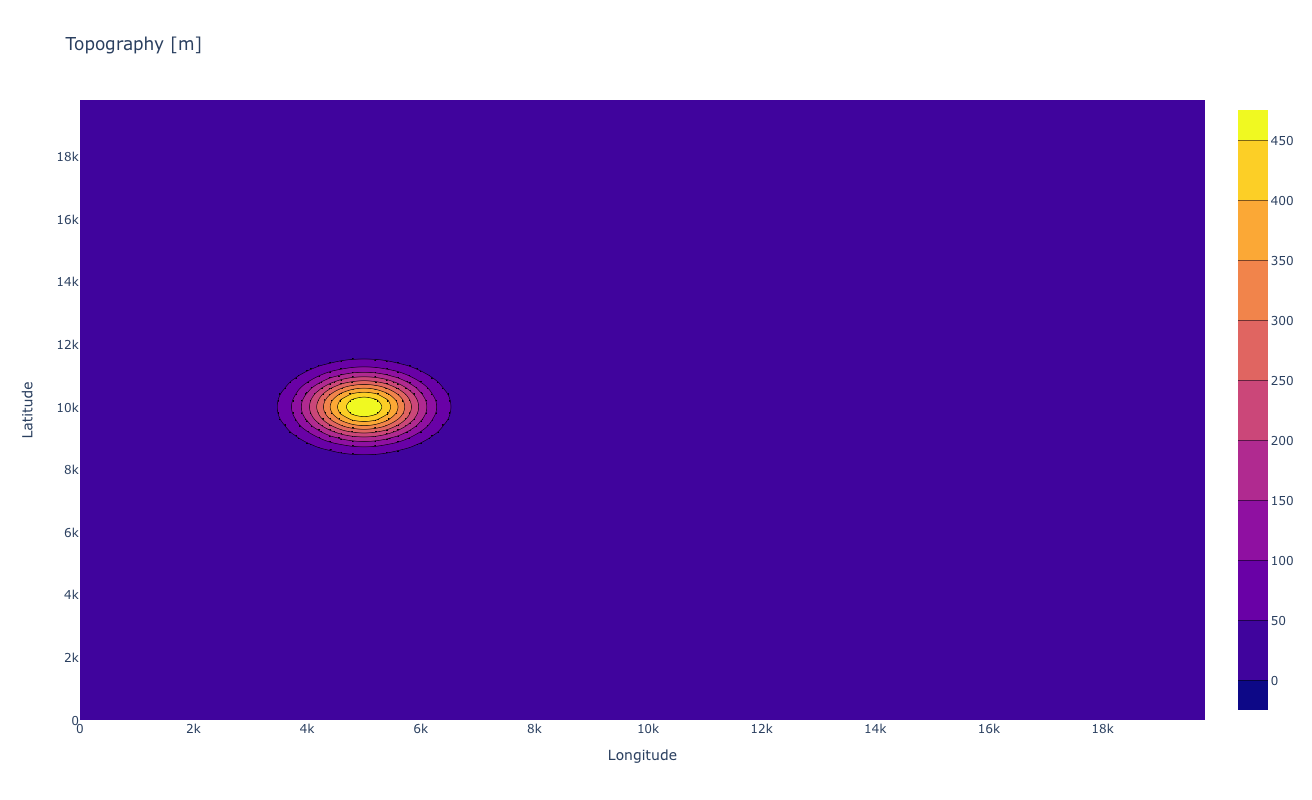

In [55]:
def plot_fields(variable, x, y, title,colorscale=None):

    # Create the subplots
    fig = make_subplots(rows=1, cols=1, horizontal_spacing = 0.2)

    # Add the first contour plot to the first subplot
    fig.add_trace(go.Contour(
        z=variable,  # Pass the values of the first variable
        x=x,  # Pass the x-axis values
        y=y,  # Pass the y-axis values
        colorscale=colorscale
    ))

    # Set the layout of the subplots
    fig.update_layout(
        title=title,
        xaxis=dict(title='Longitude'),
        yaxis=dict(title='Latitude'),
        height=800,  # Adjust the height of the subplots
        width=800,  # Adjust the width of the subplots
    )

    # Display the subplots
    fig.show()

plot_fields(h,x,y,'Topography [m]')

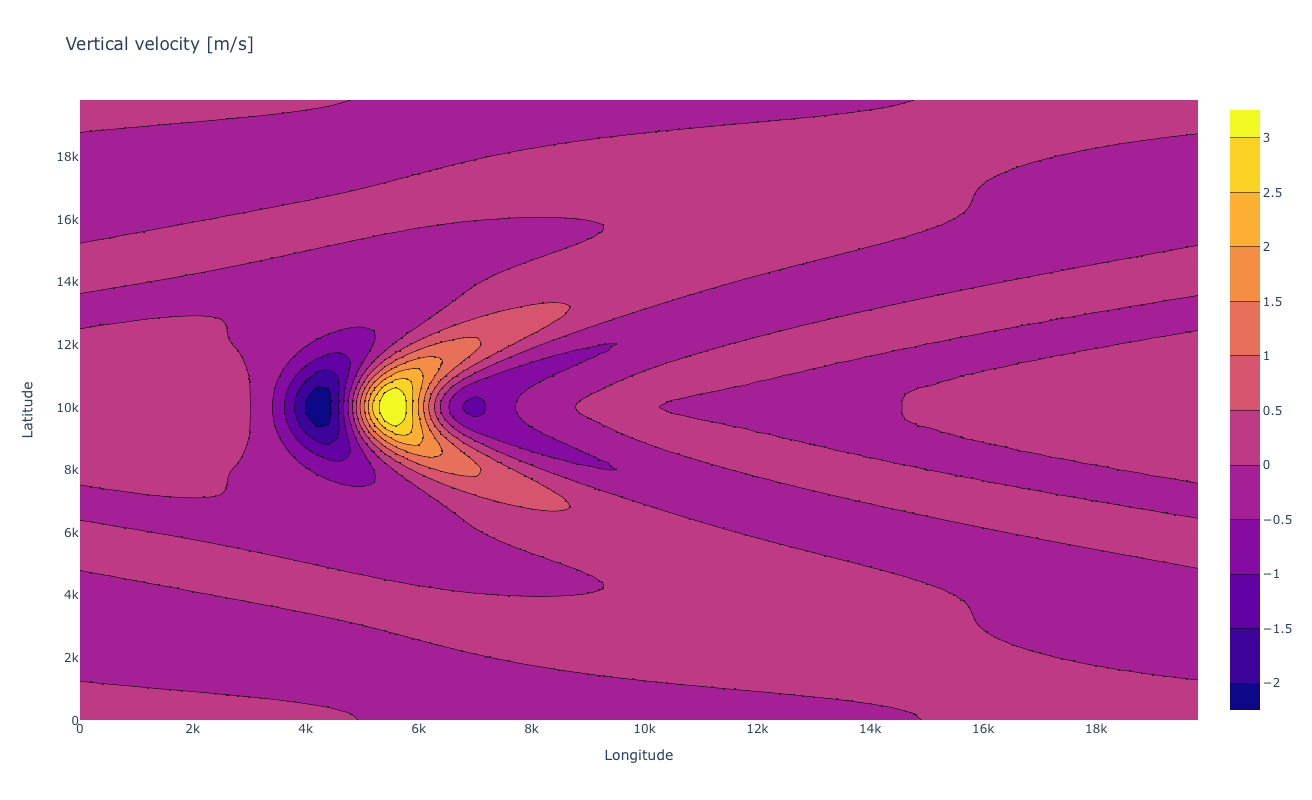

In [136]:
# Define parameters
varDict = { 'U':10.0,
        'V':0.00,
        'Cw':0.004,
        'N':6e-2,
        'Hw':2620,
        'tau':500,
        'dx':200.0,
        'dy':200.0,
        'Nx':len(x),
        'Ny':len(y),
        'lon':x,
        'lat':y,
        'ts':3600,
        'DEM':h,
        'output': './opm_result.nc',
        'z':500,
        }

#-----------------------------
# Load the learning materials
#-----------------------------"
mv = HU_mountain_waves(varDict)


# Run the model
mv.opmRun()

ds = xr.open_dataset('./opm_result.nc')
plot_fields(ds.w,ds.lon,ds.lat,'Vertical velocity [m/s]')

<div class="alert alert-block alert-warning">
<b>Broaden Knowledge & Comprehension</b></br>
<ul>
<li>Calculate the natural wavelength $\lambda$ and the Froude number
<li>Change the height $z$ above the ground for which the vertical velocity perturbation is calculated. How does the pattern change with height? Look up in the literature why the pattern is changing
<li>Change the Brunt-Väisälä frequency such that the Froude number $Fr<1$, $Fr \approx 1$, and $Fr>1$. How does the pattern change? Do the patterns match the Froude numbers?
</ul>
</div>


The model also outputs the orographic precipitation in mm per hour. The orographic precipitation model is based on mountain wave theory. Hydrometeors can form in regions where the air parcels rise in the lowest atmospheric layers. The hydrometeors are transported along with the prevailing flow for a certain time $\tau$ and then fall out. The amount of water that can precipitate depends on the water content of the atmosphere, which is given by the characteristic water vapour height Hw and the uplift sensitivity factor $C_w$.

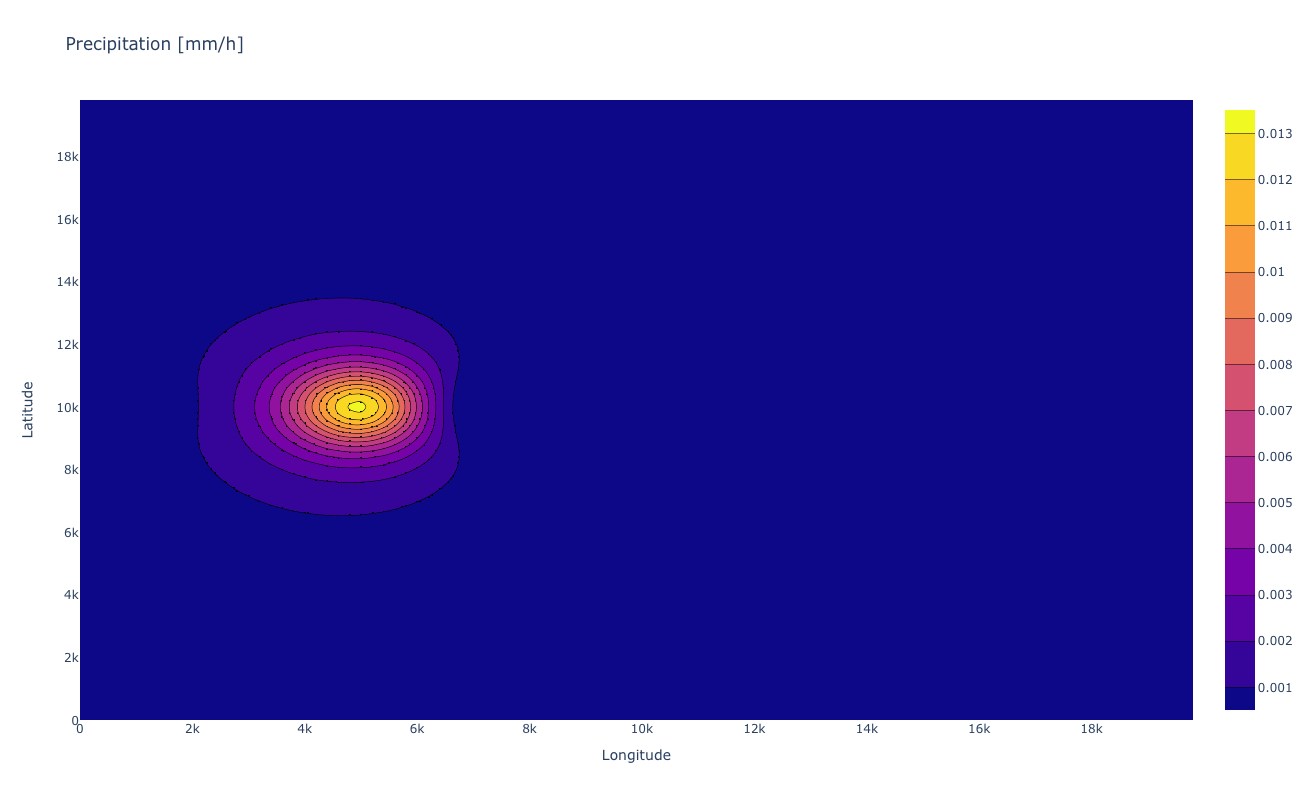

In [137]:
plot_fields(ds.P,ds.lon,ds.lat,'Precipitation [mm/h]')

<div class="alert alert-block alert-warning">
<b>Broaden Knowledge & Comprehension</b></br>
<ul>
<li>Change $C_w$, $H_w$, $U$, $V$ and $\tau$ and try to understand how the parameters influence the precipitation and its distribution.
</ul>
</div>


The same model can also be used for real-world applications. Here we use a digital elevation model from the Cordillera Darwin and calculate the mountain waves and orographic precipitation. First, we load the digital elevation model and then run the model

In [150]:
# Load digital elevation model
DEM = xr.open_dataset('./data/CordilleraDarwinSRTM.nc')

# Define parameters
varDict = { 'U':10.0,
        'V':5.00,
        'Cw':0.004,
        'N':6e-2,
        'Hw':2620,
        'tau':500,
        'dx':200.0,
        'dy':200.0,
        'Nx':DEM.dims['lon'],
        'Ny':DEM.dims['lat'],
        'lon':DEM.lon.values,
        'lat':DEM.lat.values,
        'ts':3600,
        'DEM':DEM['Band1'].values,
        'output': './data/opm_result.nc',
        'z':500,
        }

#-----------------------------
# Load the learning materials
#-----------------------------"
mv = HU_mountain_waves(varDict)


# Run the model
mv.opmRun()

Then plot the result

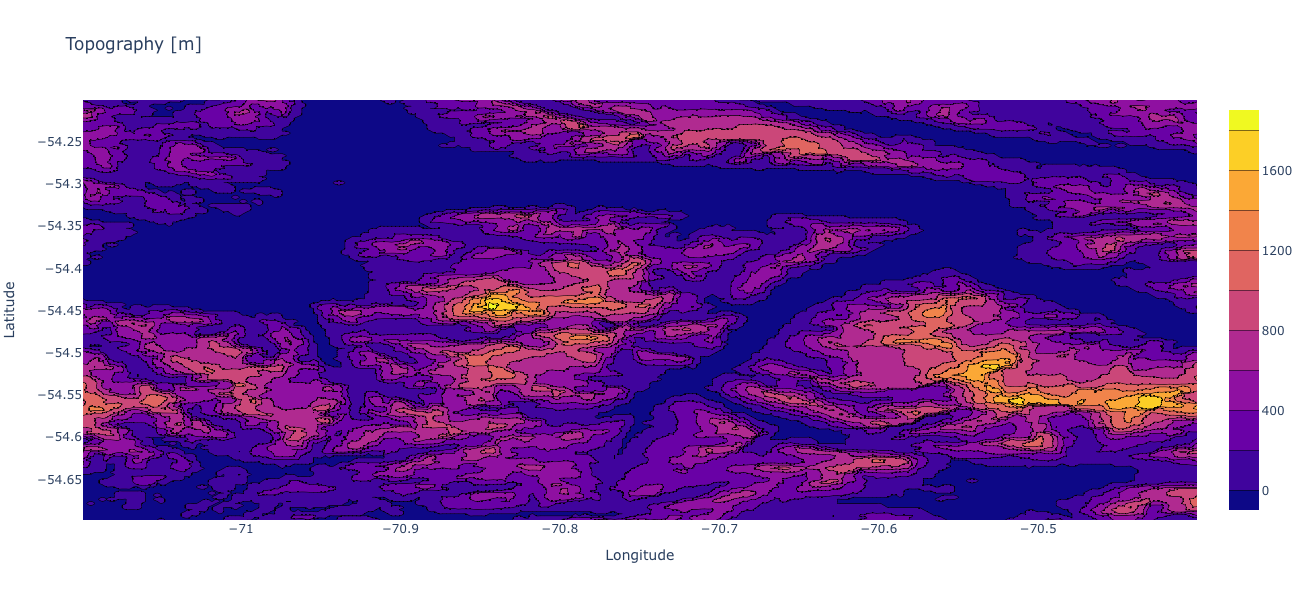

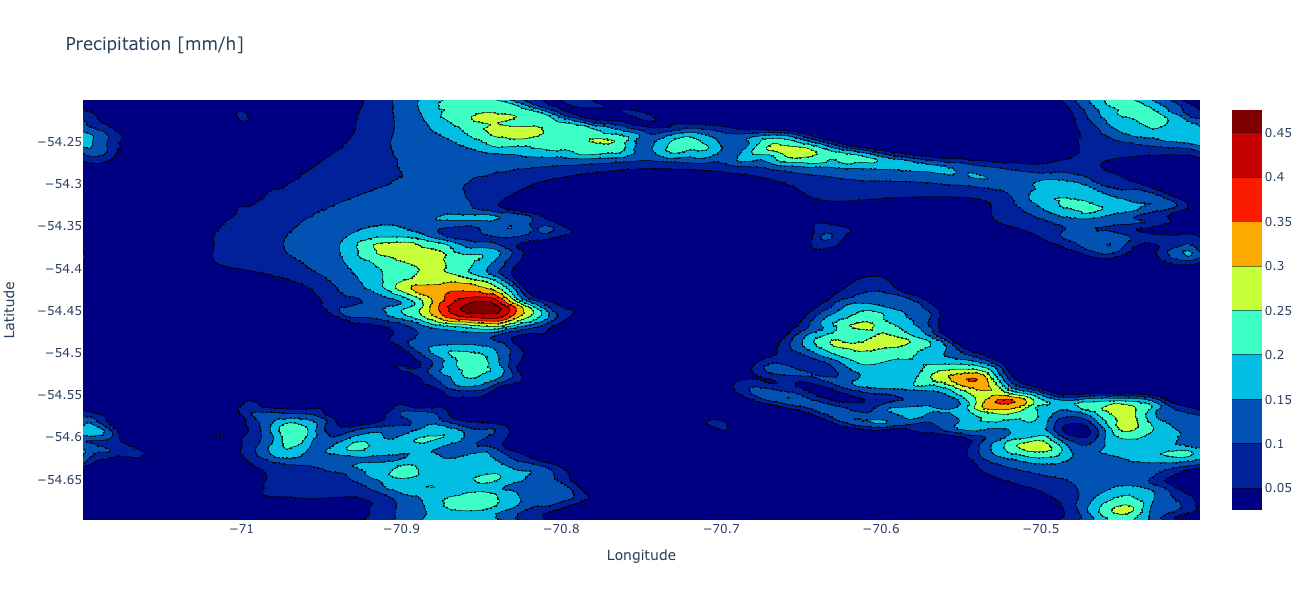

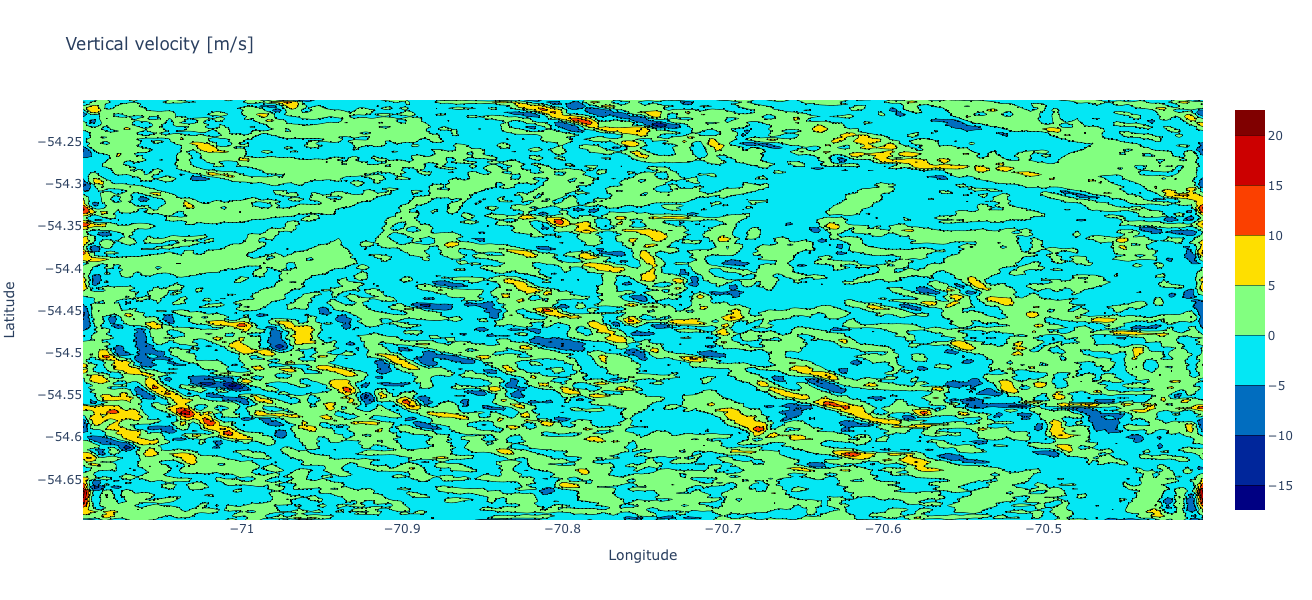

In [151]:
def plot_fields(variable, title,colorscale=None):

    # Create the subplots
    fig = make_subplots(rows=1, cols=1, horizontal_spacing = 0.2)

    # Add the first contour plot to the first subplot
    fig.add_trace(go.Contour(
        z=variable.values,  # Pass the values of the first variable
        x=variable.coords['lon'].values,  # Pass the x-axis values
        y=variable.coords['lat'].values,  # Pass the y-axis values
        colorscale=colorscale
    ))

    # Set the layout of the subplots
    fig.update_layout(
        title=title,
        xaxis=dict(title='Longitude'),
        yaxis=dict(title='Latitude'),
        height=600,  # Adjust the height of the subplots
        width=600,  # Adjust the width of the subplots
    )

    # Display the subplots
    fig.show()

# Load your xarray dataset
data = xr.open_dataset('./data/opm_result.nc')

plot_fields(data['HGT'],'Topography [m]')
plot_fields(data['P'],'Precipitation [mm/h]',colorscale='jet')
plot_fields(data['w'],'Vertical velocity [m/s]',colorscale='jet')